In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [2]:
data = pd.read_csv('products.csv')

In [3]:
data.head()

,product_id,title,price,rating,description
0,B00005TQ09,Comfort Perfume Deluxe After Wash Fabric Condi...,₹238.00,4.3 out of 5 stars,\n About this item Add comfort fabric cond...
1,B0001Y7UAI,"VillageTiger Washable, Reusable 5 Layer Respir...",₹249.00,4.0 out of 5 stars,\n About this item Care Instructions: Hand...
2,B00020BJA8,FIREWELD Welding Safety Face Shield/Head-Mount...,₹279.00,3.4 out of 5 stars,"Super lightweight design,plasma cutter face..."
3,B000BQ7GW8,"3M 1100 Ear Plug Corded, Extra Soft, Reusable ...",₹332.00,4.1 out of 5 stars,"\n About this item Smooth, dirt resistant ..."
4,B000EPR7XO,"Cadbury Bournvita Chocolate Health Drink, 2kg ...",₹670.00,4.4 out of 5 stars,This is a Vegetarian product. \n Ab...


In [4]:
data['full_description'] = data['title'] + " " + data['description']
data['full_description'] = data['full_description'].fillna('')

In [5]:
data.head()

,product_id,title,price,rating,description,full_description
0,B00005TQ09,Comfort Perfume Deluxe After Wash Fabric Condi...,₹238.00,4.3 out of 5 stars,\n About this item Add comfort fabric cond...,Comfort Perfume Deluxe After Wash Fabric Condi...
1,B0001Y7UAI,"VillageTiger Washable, Reusable 5 Layer Respir...",₹249.00,4.0 out of 5 stars,\n About this item Care Instructions: Hand...,"VillageTiger Washable, Reusable 5 Layer Respir..."
2,B00020BJA8,FIREWELD Welding Safety Face Shield/Head-Mount...,₹279.00,3.4 out of 5 stars,"Super lightweight design,plasma cutter face...",FIREWELD Welding Safety Face Shield/Head-Mount...
3,B000BQ7GW8,"3M 1100 Ear Plug Corded, Extra Soft, Reusable ...",₹332.00,4.1 out of 5 stars,"\n About this item Smooth, dirt resistant ...","3M 1100 Ear Plug Corded, Extra Soft, Reusable ..."
4,B000EPR7XO,"Cadbury Bournvita Chocolate Health Drink, 2kg ...",₹670.00,4.4 out of 5 stars,This is a Vegetarian product. \n Ab...,"Cadbury Bournvita Chocolate Health Drink, 2kg ..."


In [6]:
# Converts a collection of raw documents to a matrix of TF-IDF features
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df = 0, stop_words='english')
tfidf_matrix = tf.fit_transform(data['full_description'])

In [7]:
tfidf_matrix.shape

(55094, 1262688)

In [8]:
# I will be using the Cosine Similarity to calculate a numeric quantity 
# that denotes the similarity between two movies. 
# Since we have used the TF-IDF Vectorizer, calculating the Dot Product 
# will directly give us the Cosine Similarity Score. Therefore, we will use 
# sklearn's linear_kernel instead of cosine_similarities since it is much faster.

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [9]:
# We now have a pairwise cosine similarity matrix for all the movies in our dataset. 
# The next step is to write a function that returns the 30 most similar movies based 
# on the cosine similarity score.

data = data.reset_index()
product_ids = data['product_id']  # Defining a new variable title
indices = pd.Series(data.index, index = data['product_id'])  # Defining a new dataframe indices
type(indices)

pandas.core.series.Series

In [10]:
# Defining a function that returns 30 most similar movied bases on the cosine 
# similarity score
def get_recommendations(product_id):
    idx = indices[product_id]  # Defining a variable with indices
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1 : 30]  # Taking the 30 most similar movies
    product_indices = [i[0] for i in sim_scores]
    return product_ids.iloc[product_indices]  # returns the title based on movie indices pd.Series(reverse_product_mapping.keys(), index=range(len(reverse_product_mapping.keys())))

In [11]:
get_recommendations('B00005TQ09').head(10)

46875    B0050FXF52
46876    B001SN76SW
2955     B001764LUQ
39810    B00G6K4TXC
39781    B0089LR8O8
39782    B00009R6TG
374      B001D9IWIY
12555    B000G835DA
39809    B0000BZLAA
51526    B001O0V8HE
Name: product_id, dtype: object

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

data['full_description'] = data['title'] + " " + data['description']
data['full_description'] = data['full_description'].fillna('')
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Train the TF-IDF vectorizer on the training data
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix_train = tf.fit_transform(train_data['full_description'])

# Compute the cosine similarity matrix for the training data
cosine_sim_train = linear_kernel(tfidf_matrix_train, tfidf_matrix_train)

# Compute the cosine similarity matrix for the testing data
tfidf_matrix_test = tf.transform(test_data['full_description'])
cosine_sim_test = linear_kernel(tfidf_matrix_test, tfidf_matrix_train)

# Get the indices of the test products in the original dataset
test_indices = test_data.index.values



In [19]:
# Define a function to get the top N recommendations for each product
def get_top_N_recommendations(product_id, N):
    if product_id not in data['product_id'].values:
        return []
    idx = data.index[data['product_id'] == product_id].tolist()[0]
    # Get the cosine similarity scores for this product
    sim_scores = list(enumerate(cosine_sim_test[idx]))
    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the indices of the top N products
    product_indices = [i[0] for i in sim_scores][:N]
    # Return the top N products
    return data.iloc[product_indices]['product_id'].tolist()

In [12]:
import matplotlib.pyplot as plt

# plot a histogram of cosine similarity scores
plt.hist([cosine_sim_train.flatten(), cosine_sim_test.flatten()], bins=50)
plt.xlabel('Cosine Similarity Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Cosine Similarity Scores')
plt.show()

NameError: name 'cosine_sim_train' is not defined

In [13]:
cosine_sim[0: 1000]

array([[1.00000000e+00, 1.19470230e-03, 0.00000000e+00, ...,
        0.00000000e+00, 6.68771775e-03, 2.09586816e-03],
       [1.19470230e-03, 1.00000000e+00, 1.86446995e-02, ...,
        0.00000000e+00, 4.85103567e-03, 5.65507431e-03],
       [0.00000000e+00, 1.86446995e-02, 1.00000000e+00, ...,
        0.00000000e+00, 8.49773847e-03, 1.90752946e-03],
       ...,
       [1.13049720e-03, 1.26109770e-03, 0.00000000e+00, ...,
        0.00000000e+00, 6.75406145e-04, 2.21234573e-03],
       [7.18527473e-03, 5.67357994e-03, 9.65784088e-04, ...,
        0.00000000e+00, 8.74939433e-03, 1.66577792e-02],
       [1.04501598e-03, 1.16574128e-03, 1.70639806e-03, ...,
        0.00000000e+00, 4.70474752e-03, 2.04506180e-03]])

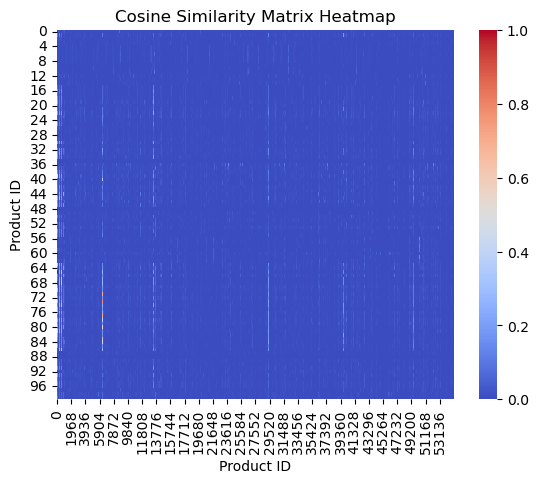

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot a heatmap of the cosine similarity matrix
sns.heatmap(cosine_sim[, cmap='coolwarm')
plt.title('Cosine Similarity Matrix Heatmap')
plt.xlabel('Product ID')
plt.ylabel('Product ID')
plt.show()


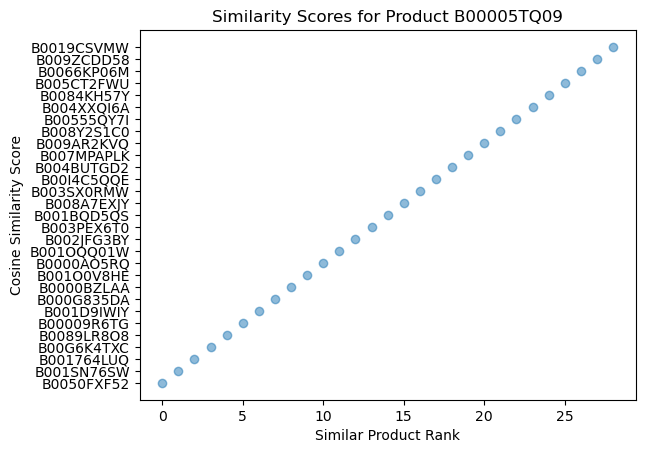

In [14]:
import matplotlib.pyplot as plt

# get the similarity scores for a particular product
product_id = 'B00005TQ09'  # change this to the desired product ID
similar_products = get_recommendations(product_id)

# plot a scatterplot of the similarity scores
plt.scatter(x=range(len(similar_products)), y=similar_products, alpha=0.5)
plt.title('Similarity Scores for Product {}'.format(product_id))
plt.xlabel('Similar Product Rank')
plt.ylabel('Cosine Similarity Score')
plt.show()


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('products.csv')

# Pre-process the data
data['full_description'] = data['title'] + " " + data['description']
data['full_description'] = data['full_description'].fillna('')

# Define a TF-IDF vectorizer with default parameters
tfidf = TfidfVectorizer()

# Compute the TF-IDF matrix for the original data
tfidf_matrix = tfidf.fit_transform(data['full_description'])

# Compute the linear kernel for the original data
linear_kernel_orig = linear_kernel(tfidf_matrix, tfidf_matrix)




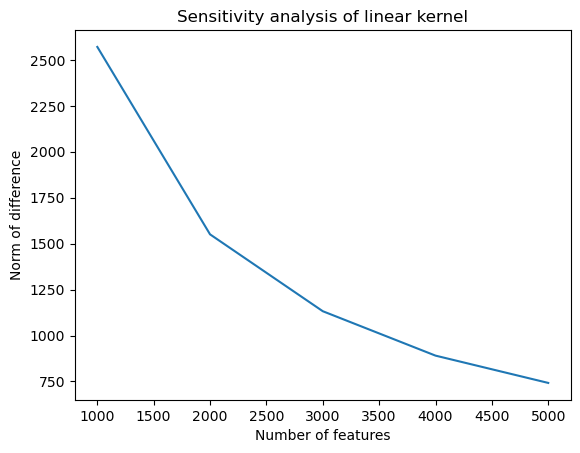

In [11]:
# Define a function to perform a sensitivity analysis on the input data
def sensitivity_analysis(data, n_features):
    # Define a new TF-IDF vectorizer with a different number of features
    tfidf_new = TfidfVectorizer(max_features=n_features)

    # Compute the TF-IDF matrix for the modified data
    tfidf_matrix_new = tfidf_new.fit_transform(data['full_description'])

    # Compute the linear kernel for the modified data
    linear_kernel_new = linear_kernel(tfidf_matrix_new, tfidf_matrix_new)

    # Compute the Frobenius norm of the difference between the original and modified kernels
    norm_diff = np.linalg.norm(linear_kernel_orig - linear_kernel_new)

    return norm_diff

# Evaluate the sensitivity of the linear kernel to changes in the number of features
n_features_list = [100, 500, 1000, 1500, 2000]
norm_diff_list = [sensitivity_analysis(data, n_features) for n_features in n_features_list]

# Plot the results
import matplotlib.pyplot as plt

plt.plot(n_features_list, norm_diff_list)
plt.xlabel('Number of features')
plt.ylabel('Norm of difference')
plt.title('Sensitivity analysis of linear kernel')
plt.show()